<a href="https://colab.research.google.com/github/ibonetc/IA_Pregrado_-2025/blob/main/Completar_PCA_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Ejemplo de PCA: Vinos (UCI Wine)
Este cuaderno muestra cómo **PCA** puede:
- Reducir dimensionalidad (13 → *k* componentes)
- Mantener o mejorar rendimiento de un clasificador simple
- Acelerar el entrenamiento
- Facilitar la **visualización** en 2D

**Modelos comparados:**
1. Baseline: `StandardScaler + LogisticRegression` (13 features)
2. `StandardScaler + PCA(≥95% varianza) + LogisticRegression`
3. `StandardScaler + PCA(2 componentes) + LogisticRegression` (para visualización)


In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score,f1_score, precision_score, ConfusionMatrixDisplay


## Cargar datos

In [ ]:
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print(f"X shape: {X.shape}  | y shape: {y.shape}")
print("Clases:", target_names)
print("Rasgos:", feature_names)


X shape: (178, 13)  | y shape: (178,)
Clases: ['class_0' 'class_1' 'class_2']
Rasgos: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [ ]:
len(feature_names)

13

## Dividir en entramiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## ¿Cuántas PCs para ≥95% de varianza?

In [ ]:
X_scaled = StandardScaler().fit_transform(X_train)

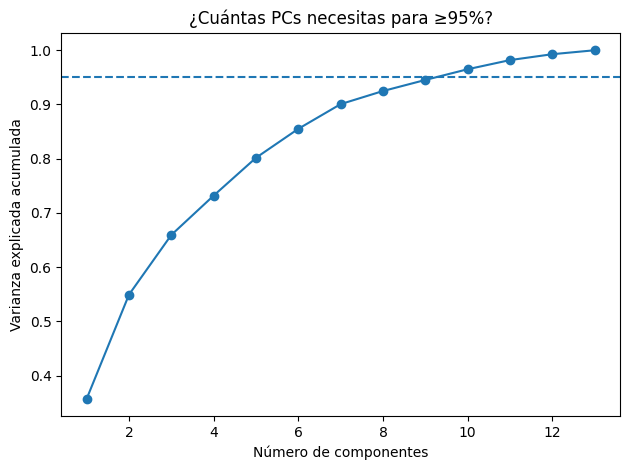

Componentes necesarios para ≥95% de varianza: 10


In [ ]:
pca_full = PCA(n_components=X_train.shape[1], svd_solver="full").fit(X_scaled)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)
plt.figure()
plt.plot(range(1, len(cum_var)+1), cum_var, marker="o")
plt.axhline(0.95, linestyle="--")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title("¿Cuántas PCs necesitas para ≥95%?")
plt.tight_layout()
plt.show()
n95 = int(np.argmax(cum_var >= 0.95)) + 1
print(f"Componentes necesarios para ≥95% de varianza: {n95}")


## Función para entrenar con un pipeline y evaluar

In [ ]:
def fit_and_eval(pipeline, name):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    recall= recall_score(y_test, y_pred, average='macro')
    f1= f1_score(y_test, y_pred, average='macro')
    precision= precision_score(y_test, y_pred, average='macro')
    return {
        "Model": name,
        "Accuracy": acc,
        "Recall": recall,
        "F1": f1,
        "Precision": precision,
        "y_pred": y_pred,
        "pipeline": pipeline
    }


# Regresión Logística sin normalizar

In [ ]:
baseline = Pipeline([
    ("clf", LogisticRegression(max_iter=2000))
])
res_baseline = fit_and_eval(baseline, "feature_All")

print("Accuracy:\t", res_baseline["Accuracy"])
print("Recall:\t\t", res_baseline["Recall"])
print("F1:\t\t", res_baseline["F1"])
print("Precision:\t", res_baseline["Precision"])

Accuracy:	 0.9629629629629629
Recall:		 0.9555555555555556
F1:		 0.961038961038961
Precision:	 0.9710144927536232


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Haga el  ejemplo normalizando con StandardScaler
# Haga el ejemplo aplicando pca con un 0.95 de acumulación de varianza, vea hasta dónde puede bajar la varianza

# Haga el ejemplo con dos componentes y visualícelo